In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# data 

In [49]:
data=pd.read_csv('F:\crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [50]:
data.shape

(50, 5)

In [51]:
data_f=data.drop('Unnamed: 0',axis='columns')
#bnk_fi=bnk_f.drop(bnk_f.iloc[:,[1,2,4,6,7,9,10,-2]],axis=1)
#bnk_fi.head()


<AxesSubplot:>

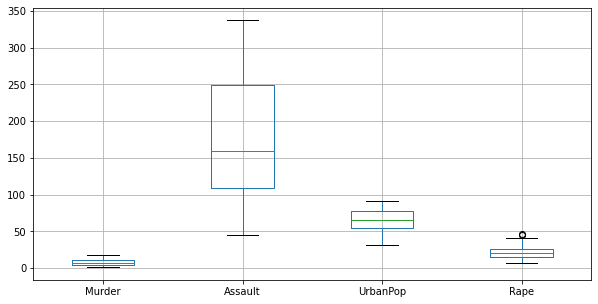

In [52]:
plt.figure(figsize=(10,5))
data.boxplot()
#In the below graph i observed that there is outliers present in the feature 'Rape'.

# K_means

In [53]:
cluster=KMeans(n_clusters=3)
label=cluster.fit_predict(data_f)
label

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sacled_data=scaler.fit_transform(data_f)



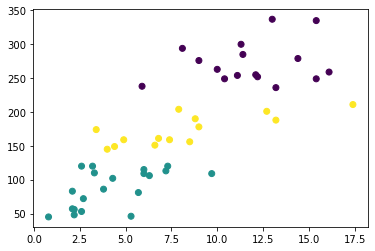

In [56]:
plt.scatter(data_f["Murder"],data_f["Assault"],c=label)

# Elbow method
#To identify the best k-value.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

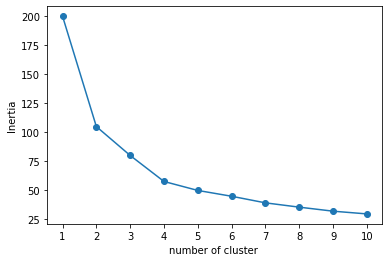

In [69]:
nc=range(1,11)
inertia=[]
for i in nc:
    cluster=KMeans(n_clusters=i)
    label=cluster.fit_predict(scaled_data)
    inertia.append(cluster.inertia_    )
    
plt.scatter(nc,inertia)   
plt.plot(nc,inertia)  
plt.xticks(nc)
plt.xlabel("number of cluster ")
plt.ylabel("Inertia")
plt.show()

In [70]:
#as above plotted the graph shows that the best k value is 4 & 5.
cluster=KMeans(n_clusters=4)
k4_label=cluster.fit_predict(scaled_data)
k4_label

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

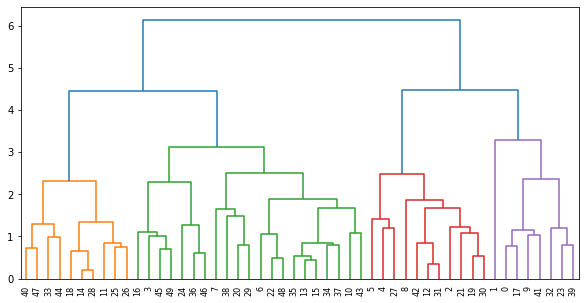

In [73]:
plt.figure(figsize=(10,5))
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='complete'))

plt.show()


# Heirarchy method

In [117]:
h_crime=data_f.copy()
h_crime.head()

,Murder,Assault,UrbanPop,Rape,c_predict
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [96]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='l2',linkage='complete')
label=cluster.fit_predict(scaled_data)
#label=np.array('label')
print(label)

[1 4 2 0 2 2 0 0 2 1 0 3 2 0 3 0 0 1 3 2 0 2 0 1 0 3 3 2 3 0 2 2 1 3 0 0 0
 0 0 1 3 1 2 0 3 0 0 3 0 0]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [78]:
data_f['c_predict']=label

In [79]:
data_f.head()

,Murder,Assault,UrbanPop,Rape,c_predict
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [85]:
h_crime['c_predict'].value_counts()

0    21
2    11
3    10
1     7
4     1
Name: c_predict, dtype: int64

In [87]:
data['c_id']=cluster.labels_
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,c_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


In [88]:
h_crime.groupby(['c_predict']).agg(['mean']).reset_index()

,c_predict,Murder,Assault,UrbanPop,Rape,c_id
,,mean,mean,mean,mean,mean
0,0,5.871429,134.476190,70.761905,18.580952,0.0
1,1,14.671429,251.285714,54.285714,21.685714,1.0
2,2,11.054545,264.090909,79.090909,32.618182,2.0
3,3,3.180000,78.700000,49.300000,11.630000,3.0
4,4,10.000000,263.000000,48.000000,44.500000,4.0


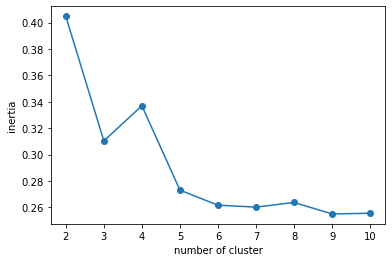

In [119]:
from sklearn.metrics import silhouette_score
cn=range(2,11)
sil=[]
for i in cn:
    cluster=AgglomerativeClustering(n_clusters=i)
    label=cluster.fit_predict(scaled_data)
    sil.append(silhouette_score(scaled_data,label))

plt.scatter(cn,sil)
plt.plot(cn,sil)
plt.xticks(cn)
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.show()
    

In [121]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=7)
DB=dbscan.fit(scaled_data)
DB.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [128]:
d_crime=data.copy()
d_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,c_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


In [129]:
d_crime=d_crime.drop(['Unnamed: 0','c_id'],axis='columns')
d_crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [130]:
d_crime['dbscan_p']=DB.labels_

In [131]:
d_crime.head()

,Murder,Assault,UrbanPop,Rape,dbscan_p
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


# Airline Data

In [40]:
air_data=pd.read_csv('F:\class hm\EastWestAirlines.csv')
air_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [41]:
air_data=air_data.rename({'ID#':'id','Award?':'award'},axis=1)
air_data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
air_data.isnull().sum()

id                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

In [11]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [12]:
air_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,3999.0,2014.82,1160.76,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.33,100775.66,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.11,773.66,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.06,1.38,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.01,0.15,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.01,0.20,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.85,24150.97,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.60,9.60,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.06,1400.21,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.37,3.79,0.0,0.0,0.0,1.0,53.0


In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
sc_data=ss.fit_transform(air_data)

# KMeans

In [42]:
km_data=air_data.copy()
km_data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [43]:
cluster=KMeans(n_clusters=5)
air_label=cluster.fit_predict(sc_data)
print(air_label)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 3 3 3]


In [45]:
km_data['k5_predict']=air_label
km_data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,k5_predict
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\

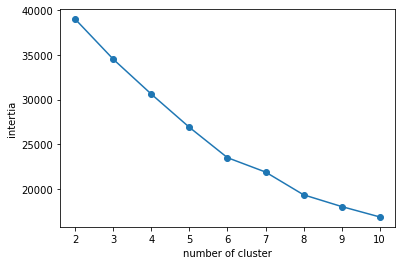

In [14]:
nc=range(2,11)
inertia=[]
for i in nc:
    cluster=KMeans(n_clusters=i)
    air_label=cluster.fit_predict(sc_data)
    inertia.append(cluster.inertia_ )
    
plt.scatter(nc,inertia)
plt.plot(nc,inertia)
plt.xticks(nc)
plt.xlabel('number of cluster')
plt.ylabel('intertia')
plt.show()

In [15]:
#by seeing the above graph we can conclude that best cluster is 6.

# Hierarchy method

In [46]:
h_air_dt=air_data.copy()

In [55]:
cluster=AgglomerativeClustering(n_clusters=5)
h_label=cluster.fit_predict(sc_data)

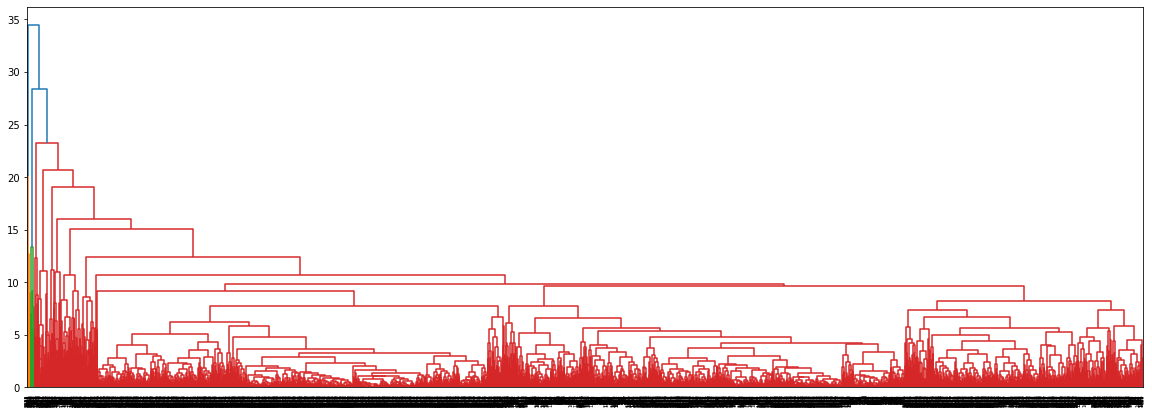

In [58]:
plt.figure(figsize=(20,7))
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(sc_data,method='complete'))

plt.show()


In [48]:
h_air_dt['h_predict']=h_label
h_air_dt.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_predict
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


# Silhoutte clustering

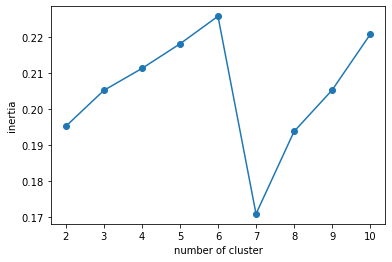

In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import *
cn=range(2,11)
sil=[]
for i in cn:
    cluster=AgglomerativeClustering(n_clusters=i)
    label=cluster.fit_predict(sc_data)
    sil.append(silhouette_score(sc_data,label))

plt.scatter(cn,sil)
plt.plot(cn,sil)
plt.xticks(cn)
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.show()
#From the below the graph plotted i observed that the best cluster for hirarchay clustering is 6.

# DBSCAN

In [50]:
db_air_data=air_data.copy()
db_air_data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [36]:
from sklearn.cluster import DBSCAN
dbscn=DBSCAN(eps=1,min_samples=6)
db_label=dbscn.fit_predict(sc_data)


In [53]:
db_air_data['db_predict']=db_label
#for DBCAN also there is validation technique for number of clusters.
db_air_data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,db_predict
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
